# Generative Adversarial Models (GANs)


Generative Adversarial Networks, or GANs for short, are an approach to generative modeling using deep learning methods, such as convolutional neural networks.

Generative modeling is an unsupervised learning task in machine learning that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn the original dataset. 

GANs are a clever way of training a generative model by framing the problem as a supervised learning problem with two sub-models: the generator model that we train to generate new examples, and the discriminator model that tries to classify examples as either real (from the domain) or fake (generated). The two models are trained together in a zero-sum game, adversarial, until the discriminator model is fooled about half the time, meaning the generator model is generating plausible examples.


## GAN Architecture

The GAN Model architecture involves two sub-models: a generator model for generating new examples and a discriminator model for classifying whether the generated examples are real, from the domain, or fake, generated by the generator model.

### The Generator Model

A generative model is a model of the conditional probability of the observable X, given a target y, symbolically, **P(X|Y=y)**

A generative model predicts features given a class. It is a generator.

"Machine-learning models can learn the statistical latent space of images, music, and stories, and they can then sample from this space, creating new artworks with characteristics similar to those the model has seen in its training data."

— Page 270, Deep Learning with Python, 2017.

After training, the generator model is kept and used to generate new samples.

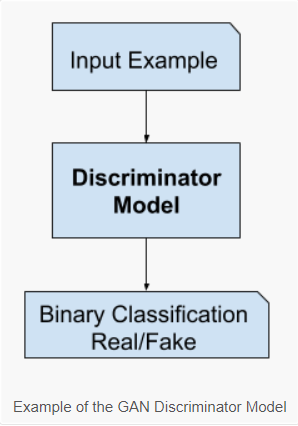

### The Discriminator Model

A discriminative model is a model of the conditional probability of the target Y, given an observation x, symbolically, **P(Y|X=x)**

A  discriminative model predicts a class given features. It is a classifier. 

"We propose that one way to build good image representations is by training Generative Adversarial Networks (GANs), and later reusing parts of the generator and discriminator networks as feature extractors for supervised tasks"

— Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks, 2015.

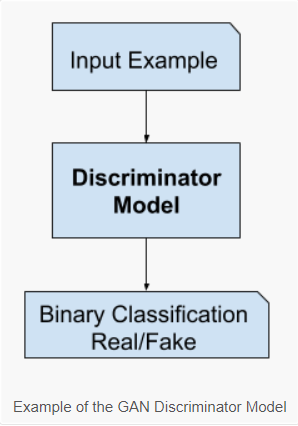




## GANs as a Two Player Game

The two models, the generator and discriminator, are trained together. The generator generates a batch of samples, and these, along with real examples from the domain, are provided to the discriminator and classified as real or fake.

The discriminator is then updated to get better at discriminating real and fake samples in the next round, and importantly, the generator is updated based on how well, or not, the generated samples fooled the discriminator.


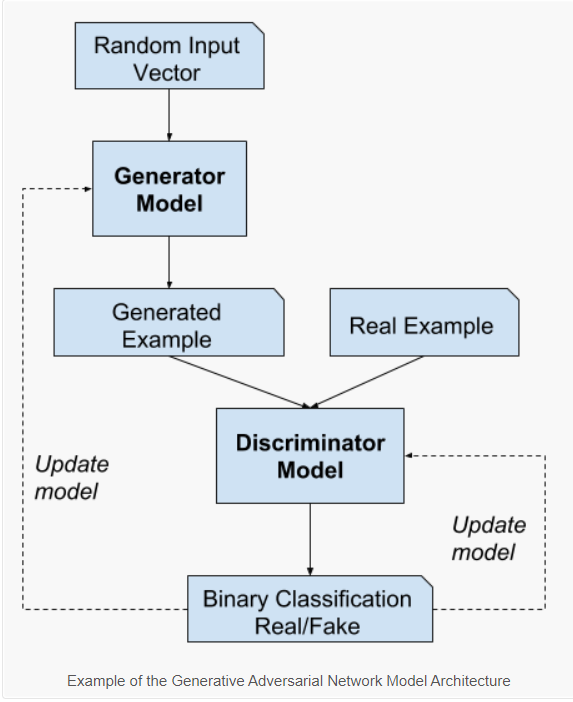

## Why GANs

1. Image Super-Resolution. The ability to generate high-resolution versions of input images.

2. Creating Art. The ability to great new and artistic images, sketches, painting, and more.

3. Image-to-Image Translation. The ability to translate photographs across domains, such as day to night, summer to winter, and    more.



Perhaps the most compelling reason that GANs are widely studied, developed, and used is because of their success. GANs have been able to generate photos so realistic that humans are unable to tell that they are of objects, scenes, and people that do not exist in real life.

Astonishing is not a sufficient adjective for their capability and success.



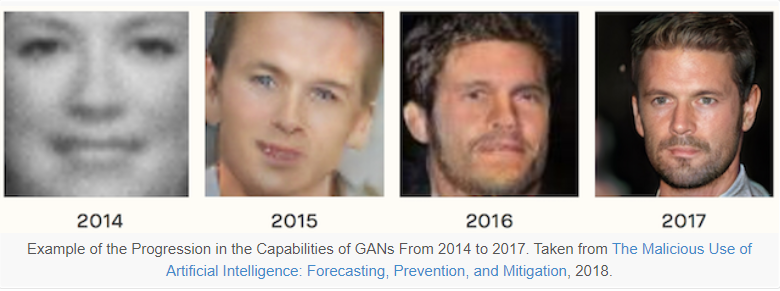



## GAN Implementation

In this example implementation of GAN, we are training generative models to create images of dogs.

Kaggle Link - https://www.kaggle.com/c/generative-dog-images


### Dataset

The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. 

Contents:

1. Number of Categories: 120
2. Number of Images: 20,580
3. Annotations: Class Labels, Bounding Boxes

In [1]:
#Importing all the Necessary Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in this directory.
#Running this will list the files in the input directory

import os
print(os.listdir("Z:\Data_Science_ML_DL_Auto_RL/Advanced_Data_Sciences_and_Architecture_INFO_7390/Mini_Project_3/Data"))

['all-dogs']


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import os
from torch import nn, optim
import torch.nn.functional as F

from time import time
from PIL import Image
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.utils.data import Dataset, DataLoader
import os
import time

In [11]:
#Image Pre Processing

batch_size = 32

'64x64 images'

transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder('Z:\Data_Science_ML_DL_Auto_RL/Advanced_Data_Sciences_and_Architecture_INFO_7390/Mini_Project_3/Data/', transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)

imgs, label = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


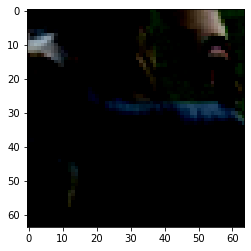

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


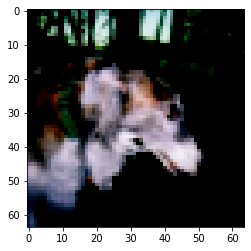

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


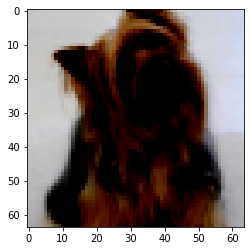

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


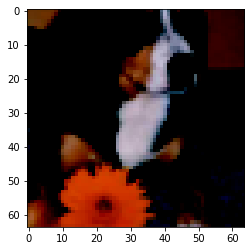

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


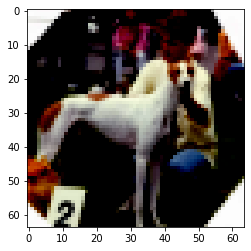

In [39]:
#First Look at the Images

for i in range(5):
    plt.imshow(imgs[i])
    plt.show()

In [12]:
#Building the Generator

class Generator(nn.Module):
    def __init__(self, nz, nfeats, nchannels):
        super(Generator, self).__init__()

        # input is Z, going into a convolution
        self.conv1 = nn.ConvTranspose2d(nz, nfeats * 8, 4, 1, 0, bias=False)
        self.bn1 = nn.BatchNorm2d(nfeats * 8)
        # state size. (nfeats*8) x 4 x 4
        
        self.conv2 = nn.ConvTranspose2d(nfeats * 8, nfeats * 8, 4, 2, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(nfeats * 8)
        # state size. (nfeats*8) x 8 x 8
        
        self.conv3 = nn.ConvTranspose2d(nfeats * 8, nfeats * 4, 4, 2, 1, bias=False)
        self.bn3 = nn.BatchNorm2d(nfeats * 4)
        # state size. (nfeats*4) x 16 x 16
        
        self.conv4 = nn.ConvTranspose2d(nfeats * 4, nfeats * 2, 4, 2, 1, bias=False)
        self.bn4 = nn.BatchNorm2d(nfeats * 2)
        # state size. (nfeats * 2) x 32 x 32
        
        self.conv5 = nn.ConvTranspose2d(nfeats * 2, nfeats, 4, 2, 1, bias=False)
        self.bn5 = nn.BatchNorm2d(nfeats)
        # state size. (nfeats) x 64 x 64
        
        self.conv6 = nn.ConvTranspose2d(nfeats, nchannels, 3, 1, 1, bias=False)
        # state size. (nchannels) x 64 x 64

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.conv1(x)))
        x = F.leaky_relu(self.bn2(self.conv2(x)))
        x = F.leaky_relu(self.bn3(self.conv3(x)))
        x = F.leaky_relu(self.bn4(self.conv4(x)))
        x = F.leaky_relu(self.bn5(self.conv5(x)))
        x = torch.tanh(self.conv6(x))
        
        return x


In [14]:
#Building the Discriminator

class Discriminator(nn.Module):
    def __init__(self, nchannels, nfeats):
        super(Discriminator, self).__init__()

        # input is (nchannels) x 64 x 64
        self.conv1 = nn.Conv2d(nchannels, nfeats, 4, 2, 1, bias=False)
        # state size. (nfeats) x 32 x 32
        
        self.conv2 = nn.Conv2d(nfeats, nfeats * 2, 4, 2, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(nfeats * 2)
        # state size. (nfeats*2) x 16 x 16
        
        self.conv3 = nn.Conv2d(nfeats * 2, nfeats * 4, 4, 2, 1, bias=False)
        self.bn3 = nn.BatchNorm2d(nfeats * 4)
        # state size. (nfeats*4) x 8 x 8
       
        self.conv4 = nn.Conv2d(nfeats * 4, nfeats * 8, 4, 2, 1, bias=False)
        self.bn4 = nn.BatchNorm2d(nfeats * 8)
        # state size. (nfeats*8) x 4 x 4
        
        self.conv5 = nn.Conv2d(nfeats * 8, 1, 4, 1, 0, bias=False)
        # state size. 1 x 1 x 1
        
    def forward(self, x):
        x = F.leaky_relu(self.conv1(x), 0.2)
        x = F.leaky_relu(self.bn2(self.conv2(x)), 0.2)
        x = F.leaky_relu(self.bn3(self.conv3(x)), 0.2)
        x = F.leaky_relu(self.bn4(self.conv4(x)), 0.2)
        x = torch.sigmoid(self.conv5(x))
        
        return x.view(-1, 1)


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
lr = 0.0003
beta1 = 0.5

netG = Generator(100, 32, 3).to(device)
netD = Discriminator(3, 48).to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

nz = 100
fixed_noise = torch.randn(25, nz, 1, 1, device=device)

real_label = 0.9
fake_label = 0
batch_size = train_loader.batch_size

G_losses = []
D_losses = []
epoch_time = []


In [34]:
# Function to plot Generator vs Discriminator Loss

def plot_loss (G_losses, D_losses, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH "+ str(epoch))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [35]:
def show_generated_img(n_images=5):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
        gen_image = gen_image.numpy().transpose(1, 2, 0)
        sample.append(gen_image)
    
    figure, axes = plt.subplots(1, len(sample), figsize = (64,64))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)
        
    plt.show()
    plt.close()

[1/5][0/644] Loss_D: 0.9526 Loss_G: 2.1358 D(x): 0.5889 D(G(z)): 0.2095 / 0.1105
[1/5][500/644] Loss_D: 1.2328 Loss_G: 2.3401 D(x): 0.5166 D(G(z)): 0.3572 / 0.0901


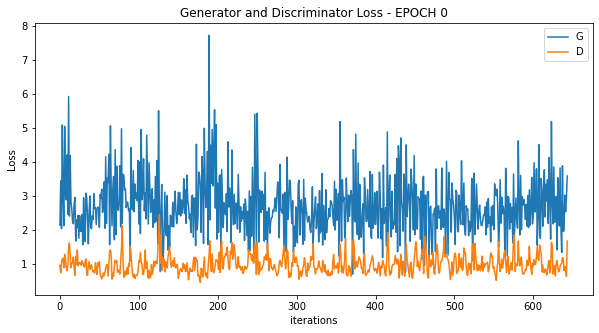

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


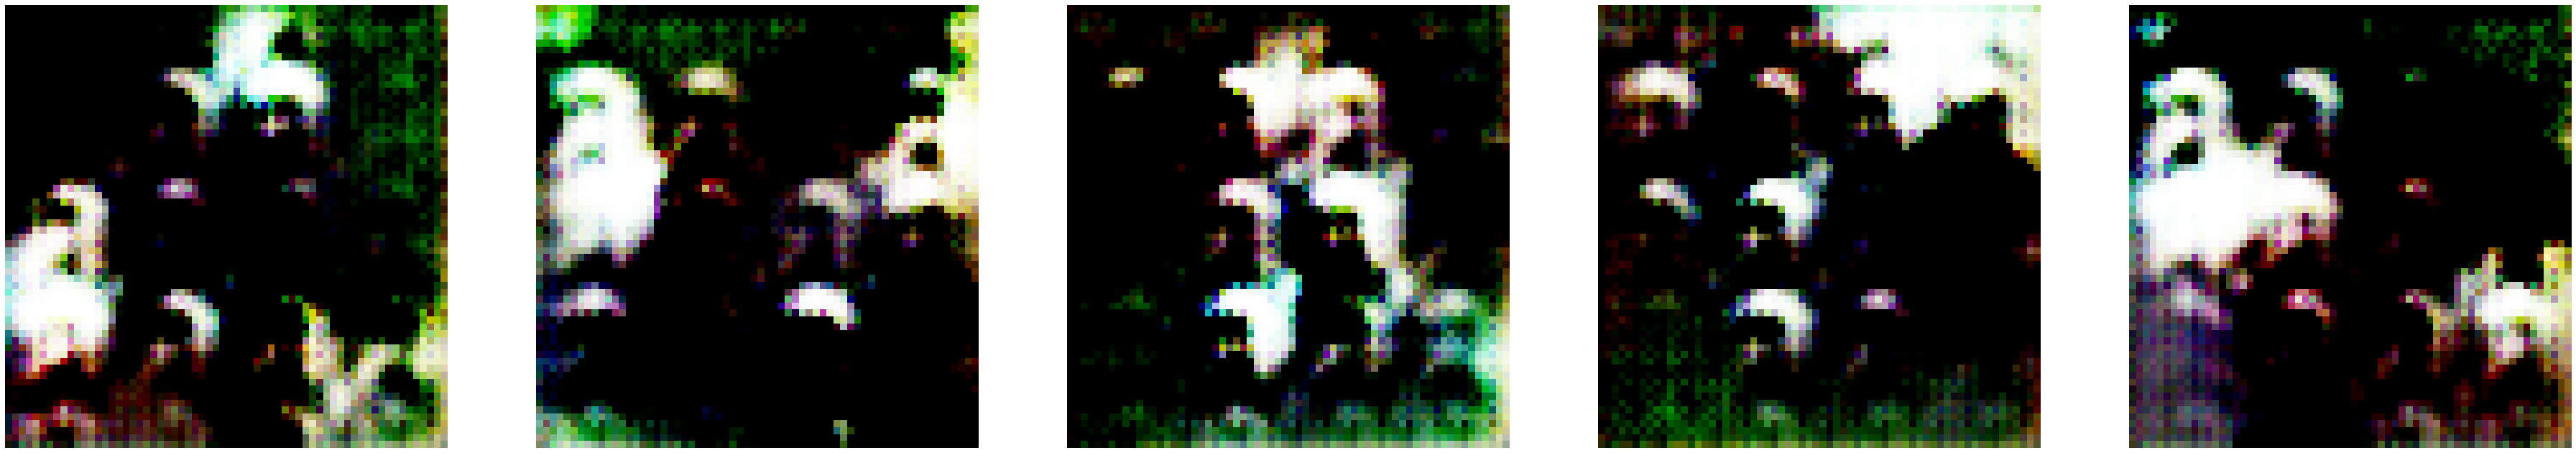

[2/5][356/644] Loss_D: 0.8721 Loss_G: 2.8134 D(x): 0.5784 D(G(z)): 0.2012 / 0.0636


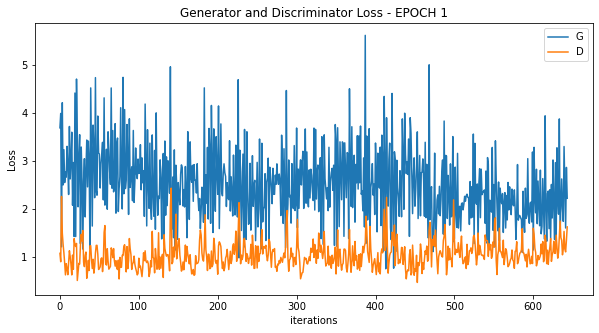

[3/5][212/644] Loss_D: 1.0684 Loss_G: 3.6575 D(x): 0.8511 D(G(z)): 0.4538 / 0.0220


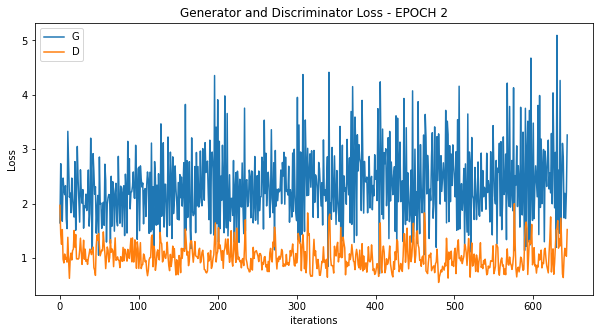

[4/5][68/644] Loss_D: 1.5946 Loss_G: 1.1945 D(x): 0.2541 D(G(z)): 0.1072 / 0.3022
[4/5][568/644] Loss_D: 1.6021 Loss_G: 1.2365 D(x): 0.2208 D(G(z)): 0.0880 / 0.2947


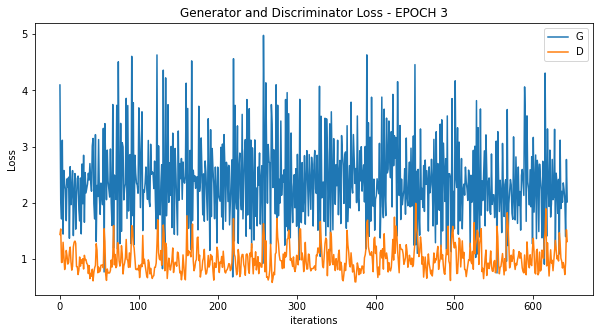

[5/5][424/644] Loss_D: 1.1035 Loss_G: 1.2055 D(x): 0.4103 D(G(z)): 0.1639 / 0.3014


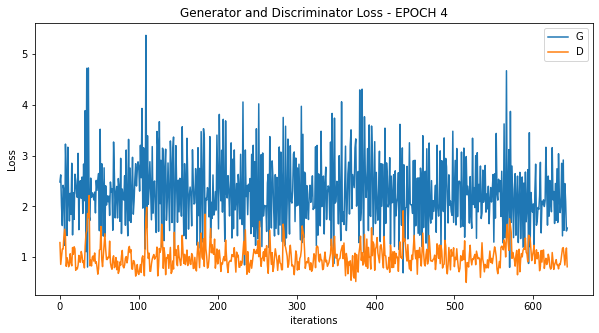

In [40]:
### Training GAN

epochs = 5

step = 0
for epoch in range(epochs):
    for ii, (real_images, train_labels) in enumerate(train_loader):
        
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        
        # train with real
        netD.zero_grad()
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size, 1), real_label, device=device)

        output = netD(real_images)   
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        labels.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()
        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        labels.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()
        
        #Saving Losses
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        
        if step % 500 == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch + 1, epochs, ii, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))  
            
            valid_image = netG(fixed_noise)
        step += 1
        
    plot_loss(G_losses, D_losses, epoch)
    G_losses = []
    D_losses = []
    if epoch % 10 == 0:
        show_generated_img()
    epoch_time.append(time.time()- start)

In [ ]:
##Saving the Generated Images in a Local Folder

if not os.path.exists('Z:\Data_Science_ML_DL_Auto_RL\Advanced_Data_Sciences_and_Architecture_INFO_7390\Mini_Project_3\output_images'):
    os.mkdir('Z:\Data_Science_ML_DL_Auto_RL\Advanced_Data_Sciences_and_Architecture_INFO_7390\Mini_Project_3\output_images')
im_batch_size = 50
n_images=10000
for i_batch in range(0, n_images, im_batch_size):
    gen_z = torch.randn(im_batch_size, 100, 1, 1, device=device)
    gen_images = netG(gen_z)
    images = gen_images.to("cpu").clone().detach()
    images = images.numpy().transpose(0, 2, 3, 1)
    for i_image in range(gen_images.size(0)):
        save_image(gen_images[i_image, :, :, :], os.path.join('Z:\Data_Science_ML_DL_Auto_RL\Advanced_Data_Sciences_and_Architecture_INFO_7390\Mini_Project_3\output_images', f'image_{i_batch+i_image:05d}.png'))


import shutil
shutil.make_archive('images', 'zip', 'Z:\Data_Science_ML_DL_Auto_RL\Advanced_Data_Sciences_and_Architecture_INFO_7390\Mini_Project_3\output_images')

## Conclusion

## References

1. Kaggle Kernels: https://www.kaggle.com/wendykan/gan-dogs-starter
2. Kaggle Kernels: https://www.kaggle.com/jesucristo/gan-introduction
3. Dataset: http://vision.stanford.edu/aditya86/ImageNetDogs/
4. Machine Learning Mastery - https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/
4. Youtube - https://www.youtube.com/watch?v=Z6rxFNMGdn0&ab_channel=LexFridman


## LICENSE

Copyright <2020> Keshav K L

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.